# Pizza Palace Sales

A year's worth of sales from a ficttitious pizza. inlcuding the date and time of each order and the pizzas served, with additional details on the type, size, quantuity, price and ingredient


# Recommended Analysis

* How many customers do we have each day? Are there any peak hours?
* How many pizzas are typically in an order? Do we have any bestsellers? 
* How much money  did we make this year? Can we identify any seasonality iin the sales 
* Are there any pizzas we should take off the menu or any promotions we could leverage 

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
order = pd.read_csv('orders.csv')
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
order_details = pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
pizza = pd.read_csv('pizzas.csv')
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [5]:
pizza_type = pd.read_csv("pizza_types.csv", encoding='latin')
pizza_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [7]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
pizza_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


pizza.info()

# Feature Engineering

In [9]:
print(order.columns)
print(order_details.columns)
print(pizza.columns)
print(pizza_type.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [10]:
pizza_df = order.merge(order_details, on="order_id").merge(pizza,on='pizza_id').merge(pizza_type, on='pizza_type_id')
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [11]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [12]:
pizza_df.isna().sum() 

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [13]:
pizza_df['date'] = pd.to_datetime(pizza_df['date'])

In [14]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.8+ MB


In [15]:
pizza_df['day'] = pizza_df['date'].dt.dayofweek +1

In [16]:
pizza_df['month'] = pizza_df['date'].dt.month

In [17]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",7,1


In [18]:
pizza_df.day.unique()

array([4, 5, 6, 7, 2, 3, 1], dtype=int64)

In [19]:
pizza_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [20]:
pizza_df['hour'] = pd.to_datetime(pizza_df.time).dt.hour

In [21]:
pizza_df.iloc[0]

order_id                                                   1
date                                     2015-01-01 00:00:00
time                                                11:38:36
order_details_id                                           1
pizza_id                                          hawaiian_m
quantity                                                   1
pizza_type_id                                       hawaiian
size                                                       M
price                                                  13.25
name                                      The Hawaiian Pizza
category                                             Classic
ingredients         Sliced Ham, Pineapple, Mozzarella Cheese
day                                                        4
month                                                      1
hour                                                      11
Name: 0, dtype: object

In [22]:
day = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

In [23]:
pizza_df['day'] = pizza_df.day.map(day)

In [24]:
month = {
    1: 'Jan', 
    2:'Feb',
    3:'Mar', 
    4:'Apr', 
    5:'May',
    6:'June', 
    7:'July',
       8:'Aug', 9:'Sept', 10:'Oct',
    11:'Nov', 12:'Dec'
}

In [25]:
pizza_df['month'] = pizza_df.month.map(month)

In [26]:
pizza_df['sales'] = pizza_df['quantity'] * pizza_df['price']


In [27]:
pizza_df.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour,sales
6532,11426,2015-07-10,15:13:53,25953,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",Friday,July,15,20.75
25639,20942,2015-12-22,11:54:20,47654,southw_ckn_l,1,southw_ckn,L,20.75,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",Tuesday,Dec,11,20.75
35719,12965,2015-08-04,21:22:24,29355,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",Tuesday,Aug,21,17.95
32817,7676,2015-05-09,17:28:55,17471,big_meat_s,1,big_meat,S,12.00,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",Saturday,May,17,12.00
34923,19715,2015-12-01,18:03:39,44858,soppressata_s,1,soppressata,S,12.50,The Soppressata Pizza,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",Tuesday,Dec,18,12.50


## How many pizzas were sold in a year ?

In [28]:
pizza_df.quantity.sum()

49574

In [29]:
# Monthly sales 
(pizza_df.quantity.sum()/12).round()

4131.0

In [30]:
# daily number of sales
(pizza_df.quantity.sum()/358).round()

138.0

# Note.
49574 pieces of pizza were sold in the year 2015 

## How many days did the restaurant operated ? 

In [31]:
pizza_df.date.count()

48620

In [32]:
pizza_df.date.duplicated().sum()

48262

In [33]:
pizza_df[~pizza_df.date.duplicated()].count()[1]

358

## Note
The restaurant operated for 358 days  in the year under review 

## How many orders were placed in the year under review ?

In [34]:
pizza_df[~pizza_df.order_id.duplicated()].count()[1]

21350

In [35]:
# Number of order places in the year 
pizza_df['order_id'].drop_duplicates().count()

21350

In [36]:
pizza_df['order_id'].drop_duplicates().count()/12

1779.1666666666667

# How much money was made ?

In [37]:
# Yearly

pizza_df.sales.sum()

817860.05

In [38]:
# Monthly

pizza_df.sales.sum()/12

68155.00416666667

In [39]:
# Daily

pizza_df.sales.sum()/358

2284.525279329609

## Which days are we busy?

In [40]:
pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)

day
Friday       8242
Saturday     7493
Thursday     7478
Wednesday    6946
Tuesday      6895
Monday       6485
Sunday       6035
Name: quantity, dtype: int64

In [98]:
day_df = pd.DataFrame(pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)).reset_index()

day_df['qty_pct'] = round(day_df['quantity'] / day_df['quantity'].sum()*100,2)

In [99]:
day_df.head(6)

,day,quantity,qty_pct
0,Friday,8242,16.63
1,Saturday,7493,15.11
2,Thursday,7478,15.08
3,Wednesday,6946,14.01
4,Tuesday,6895,13.91
5,Monday,6485,13.08


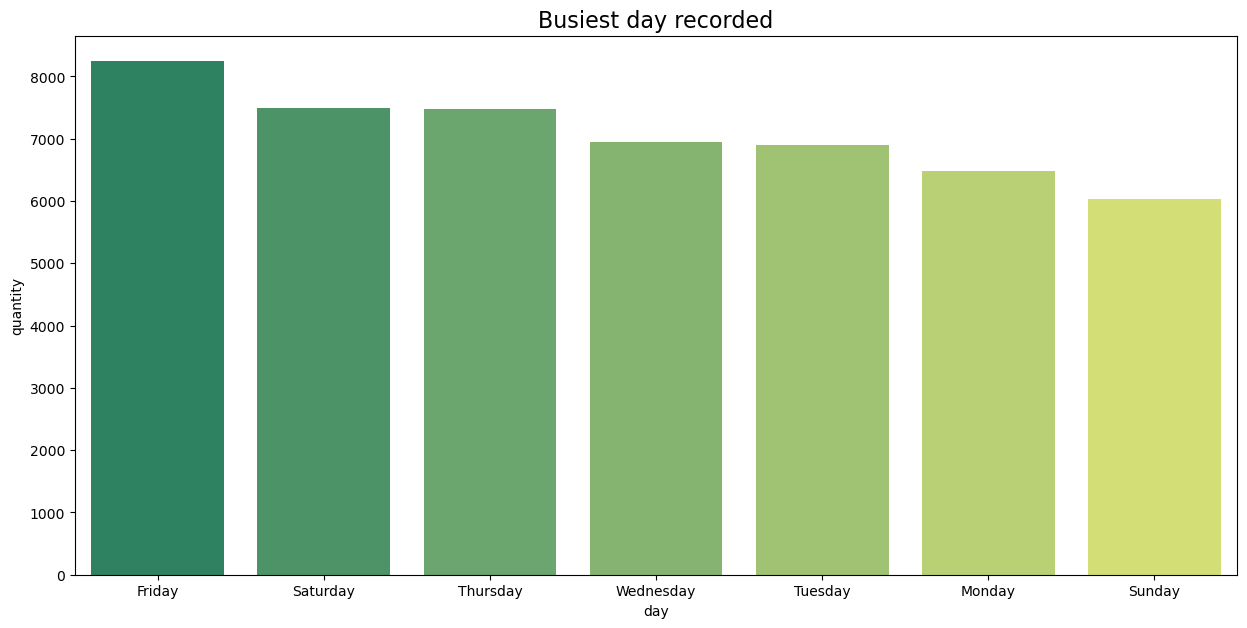

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(15,7))
sns.barplot(data=day_df, x='day', y='quantity', palette='summer')
plt.title("Busiest day recorded", fontsize=16)
plt.show()
plt.savefig('Busiest_day_recorded')

## Which day did we make more  money 

In [51]:
day_df = pd.DataFrame(pizza_df.groupby('day')['sales'].sum().sort_values(ascending=False)).reset_index()

day_df['sales_pct'] = round(day_df['sales'] / day_df['sales'].sum()*100,2)

In [52]:
sales_df.head()

,day,sales
0,Friday,136073.9
1,Thursday,123528.5
2,Saturday,123182.4
3,Wednesday,114408.4
4,Tuesday,114133.8


In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=sales_df, x='day', y='sales', palette='winter')
plt.title("Highest sales made by day", fontsize=16)
plt.show()

# How many different pizzas do we sell ? 

In [ ]:
pd.DataFrame(pizza_df.pizza_type_id.unique()).count()

# Note
32 different types of pizza is been sold 

# Top 3 selling pizza 

In [53]:
sell_df = pd.DataFrame(pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False)).reset_index()

sell_df['sell_pct'] = round(sell_df['sales'] / sell_df['sales'].sum()*100,2)

In [54]:
top3 = sell_df.head(3)
top3

,name,sales,sell_pct
0,The Thai Chicken Pizza,43434.25,5.31
1,The Barbecue Chicken Pizza,42768.00,5.23
2,The California Chicken Pizza,41409.50,5.06


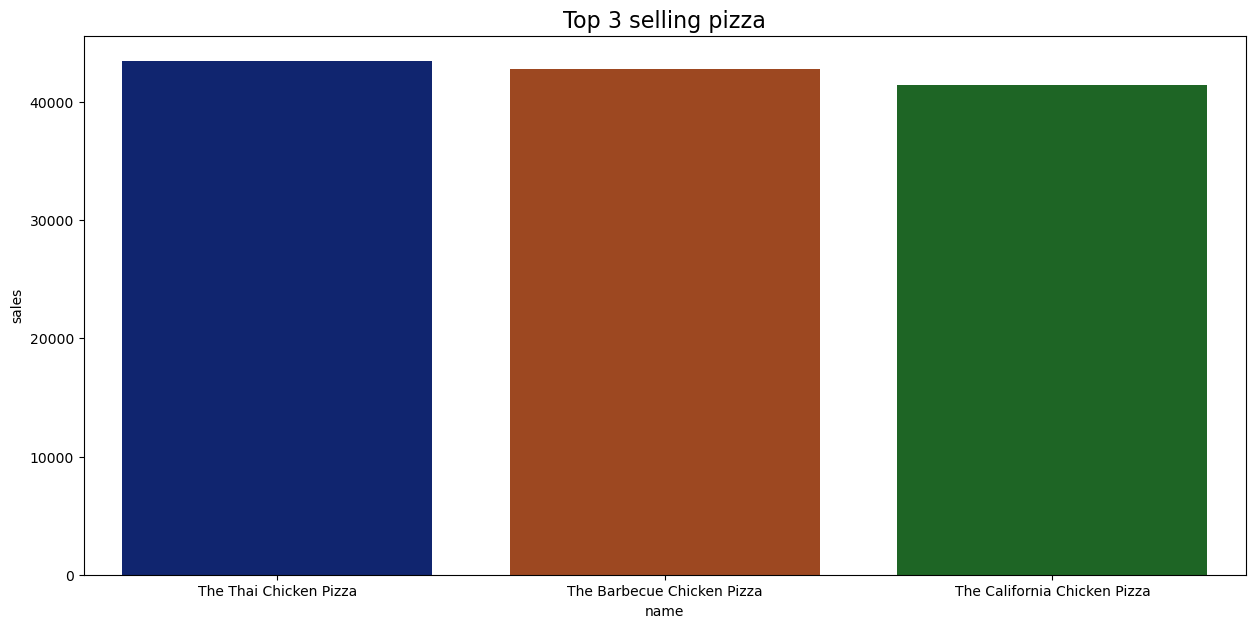

<Figure size 640x480 with 0 Axes>

In [95]:
plt.figure(figsize=(15,7))
sns.barplot(data=top3, x='name', y='sales', palette='dark')
plt.title("Top 3 selling pizza", fontsize=16)

plt.show()
plt.savefig('Top_selling Pizza')

# Worst three selling pizza 

In [56]:
last3 = sell_df.tail(3)
last3

,name,sales,sell_pct
29,The Spinach Supreme Pizza,15277.75,1.87
30,The Green Garden Pizza,13955.75,1.71
31,The Brie Carre Pizza,11588.50,1.42


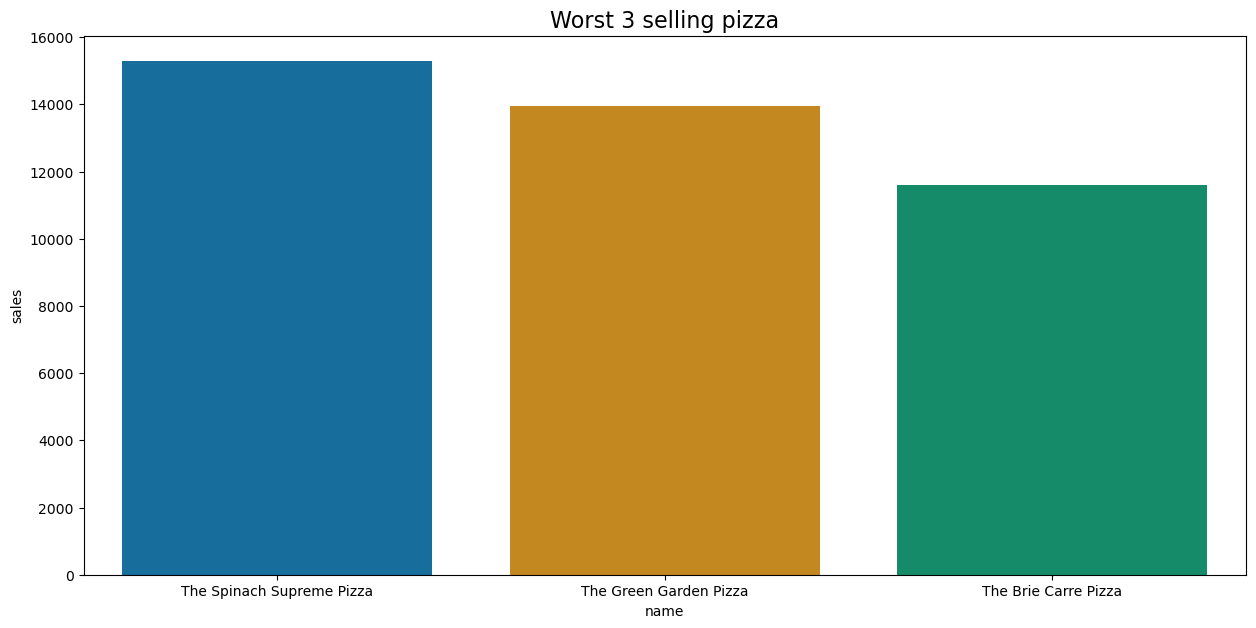

<Figure size 640x480 with 0 Axes>

In [94]:
plt.figure(figsize=(15,7))
sns.barplot(data=last3, x='name', y='sales', palette='colorblind')
plt.title("Worst 3 selling pizza", fontsize=16)
plt.show()
plt.savefig('worst_selling Pizza')

## Most pizza size sales

In [60]:
pizza_df.groupby('name')[['quantity', 'sales']].sum().reset_index().sort_values(by='sales',ascending=False)

,name,quantity,sales
30,The Thai Chicken Pizza,2371,43434.25
0,The Barbecue Chicken Pizza,2432,42768.00
4,The California Chicken Pizza,2370,41409.50
7,The Classic Deluxe Pizza,2453,38180.50
26,The Spicy Italian Pizza,1924,34831.25
25,The Southwest Chicken Pizza,1917,34705.75
14,The Italian Supreme Pizza,1884,33476.75
12,The Hawaiian Pizza,2422,32273.25
9,The Four Cheese Pizza,1902,32265.70
23,The Sicilian Pizza,1938,30940.50


In [66]:
size_df = pizza_df.groupby('size')[['quantity', 'sales']].sum().reset_index().sort_values(by='sales',ascending=False)
size_df['percent_sale'] = round(size_df['quantity'] / size_df['quantity'].sum()*100,2)
size_df

,size,quantity,sales,percent_sale
0,L,18956,375318.70,38.24
1,M,15635,249382.25,31.54
2,S,14403,178076.50,29.05
3,XL,552,14076.00,1.11
4,XXL,28,1006.60,0.06


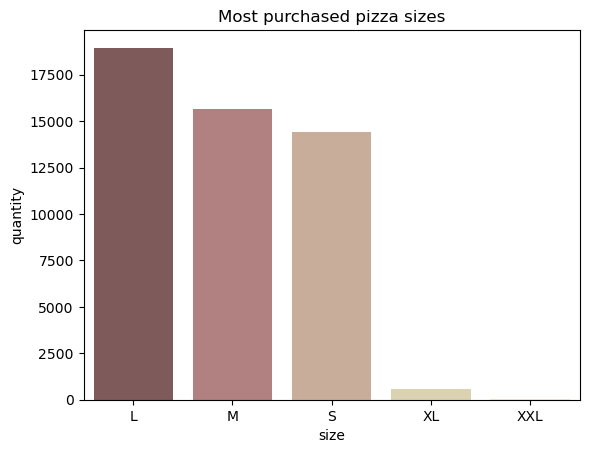

In [93]:
sns.barplot(data=size_df, x= 'size', y='quantity', palette='pink');
plt.title('Most purchased pizza sizes');
plt.savefig('Most_Purchased_pizza_sales')

# Creating a heatmap with the number of hours and quantity of pizza ordered

In [74]:
heat = pizza_df.groupby(['day', 'hour'])['quantity'].sum().unstack('hour')

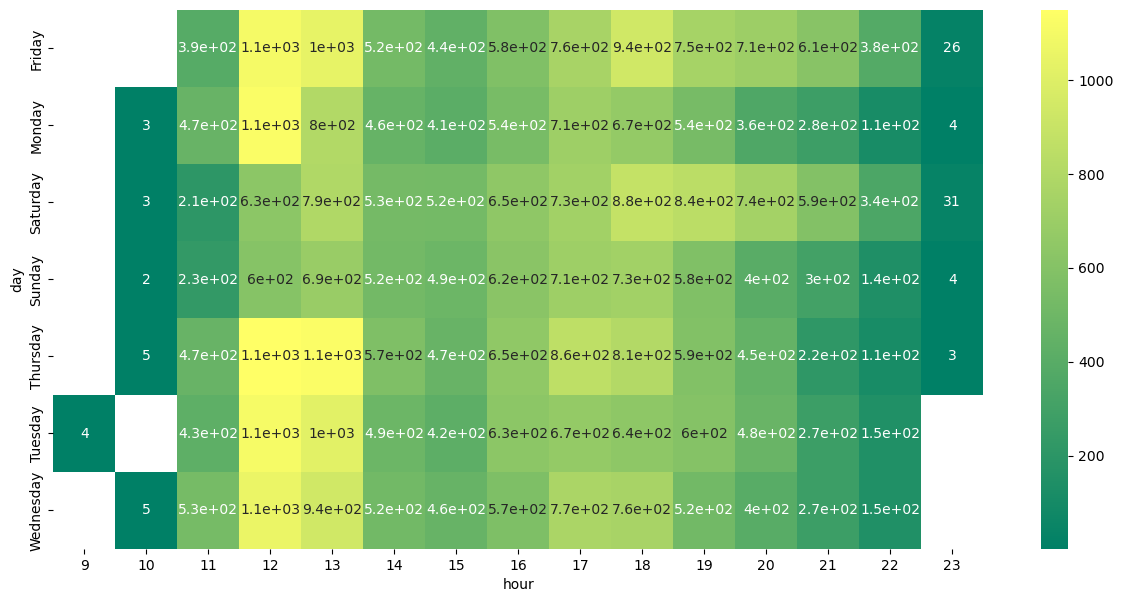

In [92]:
plt.figure(figsize=(15,7))
sns.heatmap(heat, annot = True, cmap='summer');
plt.savefig('heatmap')